In [1]:
from IPython.display import Image
  
# get the image

Image(url="heart-disease-1140x628.jpg")


## Preparing the tools
We're going to use pandas,matplotlib and numpy for data analysis and manipulation.

In [126]:
#import all the tools we need
#Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Models importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score 
from sklearn.metrics import plot_roc_curve

### Load Data

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
#rows,columns
df.shape

(1025, 14)

#### Data Exploration 

The goal here is to find more about data and become Subject Matter Expert in it.
`age`
`sex`
`chest pain type (4 values)`
`resting blood pressure`
`serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.`



age - age in years

sex - (1-male; 0 - female)

cp - chest torment type

trestbps - resting circulatory strain

chol - serum cholesterol in mg/dl

fbs - (fasting glucose )

restecg - resting electrocardiograph results

thalach - greatest pulse accomplished

exang - practice instigated angina (1 = yes; 0 = no)

oldpeak - ST wretchedness instigated by practice comparative with rest

incline - the slant of the pinnacle practice ST section

ca - number of significant vessels (0-3) hued by fluoroscope

thal - 3 = typical; 6 = fixed imperfection; 7 = reversible deformity

target - have illness or not (1=yes, 0=no)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

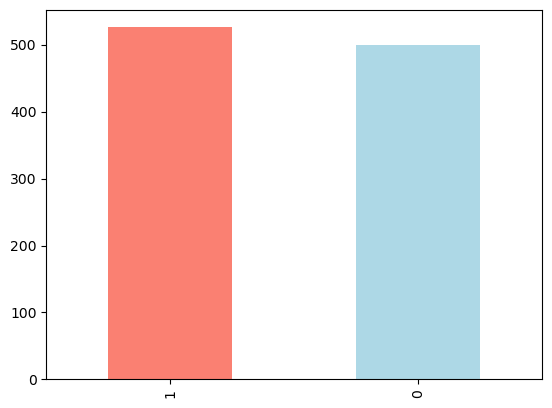

In [8]:
df.target.value_counts().plot(kind="bar",color=["Salmon","Lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Are there missing value?

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [12]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [13]:
#Compare target column with sex column
m=pd.crosstab(df.target,df.sex)
m

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

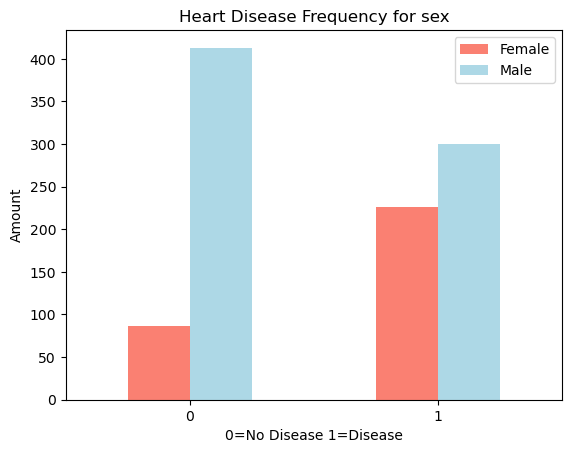

In [14]:
#Create a plot of cross tab
m.plot(kind="bar",color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

Thalach: The person’s maximum heart rate achieved. What are the symptoms of silent angina? Silent myocardial ischemia is a condition of reduced oxygen-rich blood flow to the heart that occurs in the absence of chest discomfort or other symptoms of angina, e.g., dyspnea, nausea, diaphoresis, etc.

In [15]:
df["thalach"].value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

Text(0, 0.5, 'Thalach')

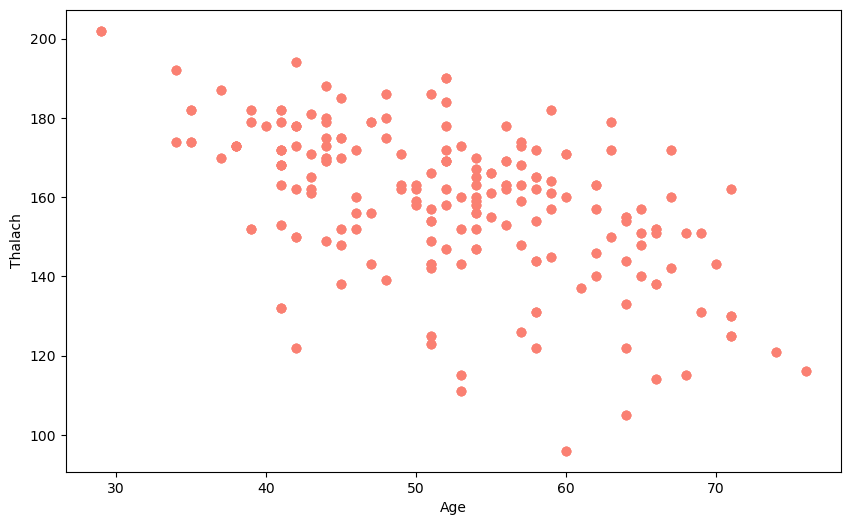

In [16]:
#Create another figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
plt.xlabel("Age")
plt.ylabel("Thalach")

Text(0, 0.5, 'Thalach')

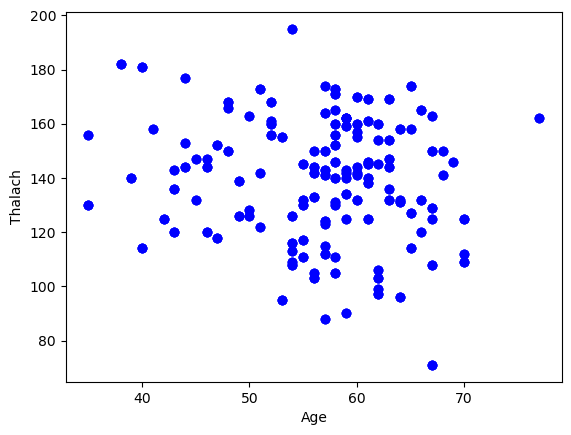

In [17]:
#scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="blue")
plt.xlabel("Age")
plt.ylabel("Thalach")

Text(0, 0.5, 'Max heart rate')

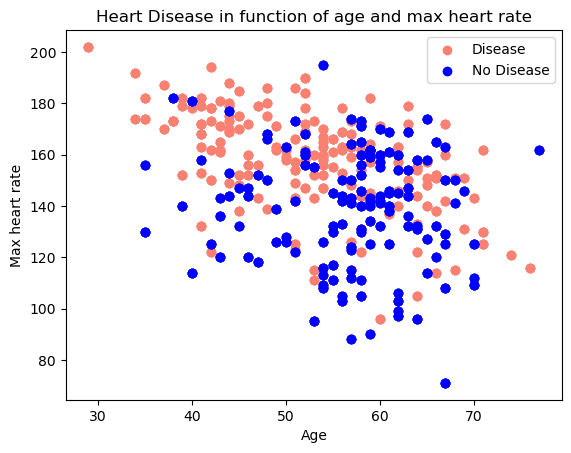

In [18]:
#Add some helpful information
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="blue")
plt.title("Heart Disease in function of age and max heart rate")
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Max heart rate")

<AxesSubplot:ylabel='Frequency'>

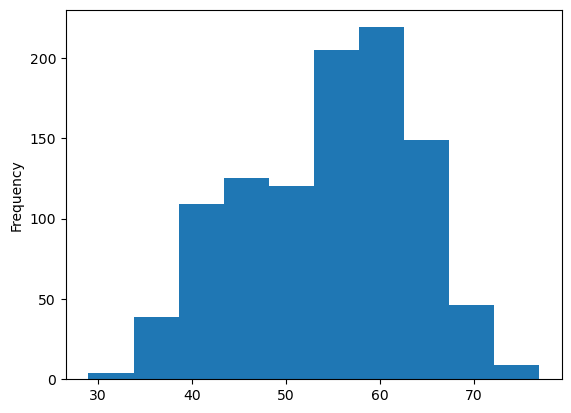

In [19]:
#Check the distribution of age column with a histogram
df.age.plot.hist()

### Heart Disease frequency per chest pain type

In [20]:
Image(url="3667-pain-scales-categorical-1296x728-body_0.jpg")

### 0 1 2 3 4 5 

In [21]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


Make crosstab more visual

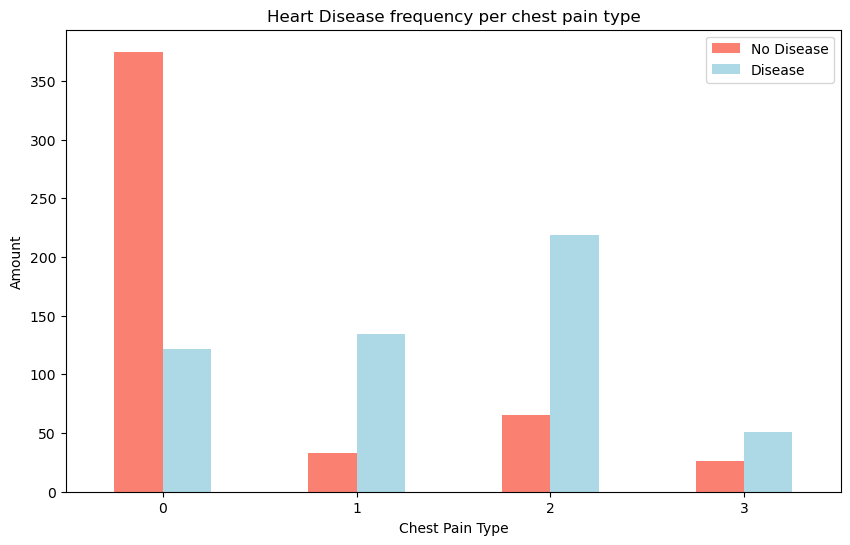

In [22]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
#Add some communication
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
#Make a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

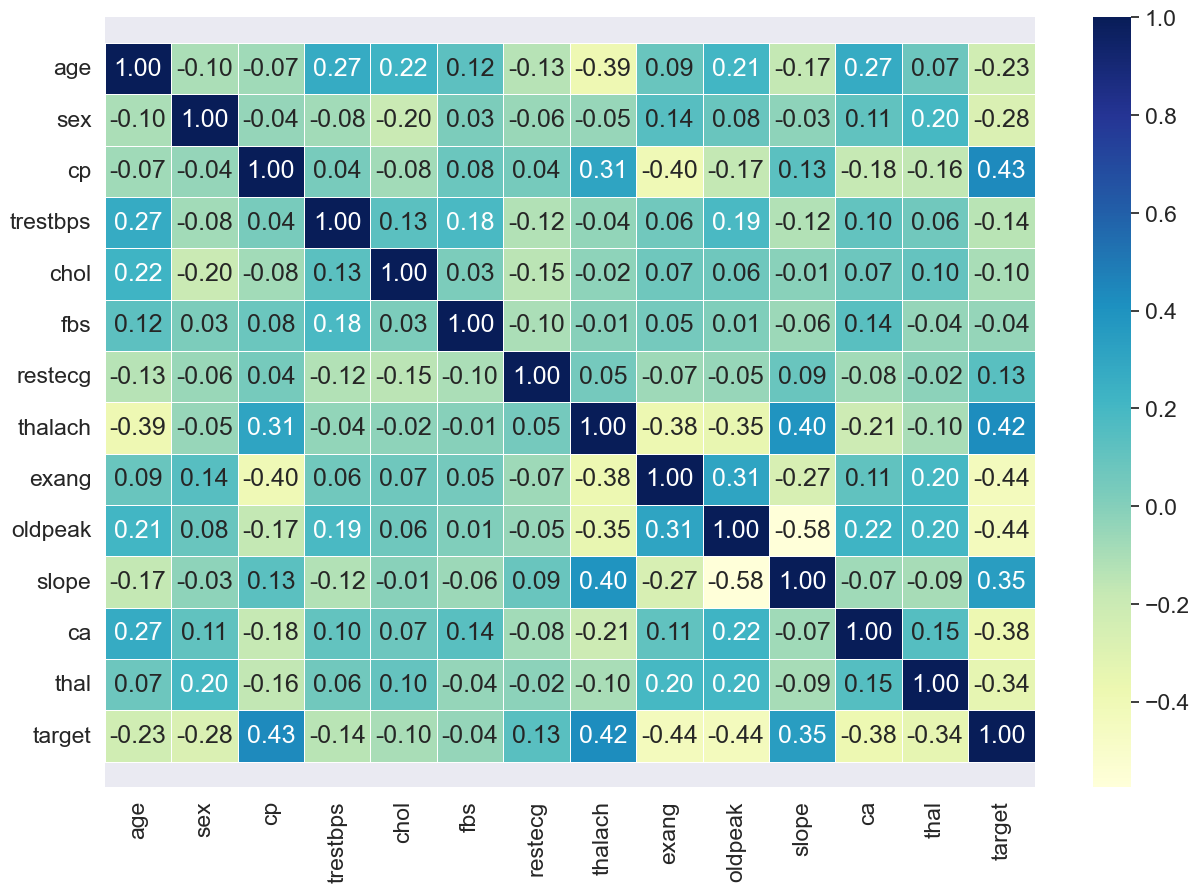

In [94]:
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
import seaborn as sns
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=.5,
              fmt=".2f",
              cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+.5,top-.5)

In [ ]:
#Modelling
df.head()

In [26]:
#split data in x and y
x=df.drop("target",axis=1)
y=df["target"]
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

`Now we're going to try 3 diff ML models
1.Logistic Regression
2.K-Neighbours Classifier
3.RandomForestClassifier`

In [27]:
#Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "RandomForest":RandomForestClassifier()
       }

In [28]:
#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        #evaluate a model
        model_score[name]=model.score(x_test,y_test)*100
    return model_score
    


In [29]:
model_scores=fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test);


D:\Code\thak\sample_proj1\hear_disease_proj\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#Model comparison
model_compare=pd.DataFrame(model_scores,index=["accuracy(%)"])
model_compare


,Logistic Regression,KNN,RandomForest
accuracy(%),78.536585,73.170732,98.536585


Text(0, 0.5, 'score(%)')

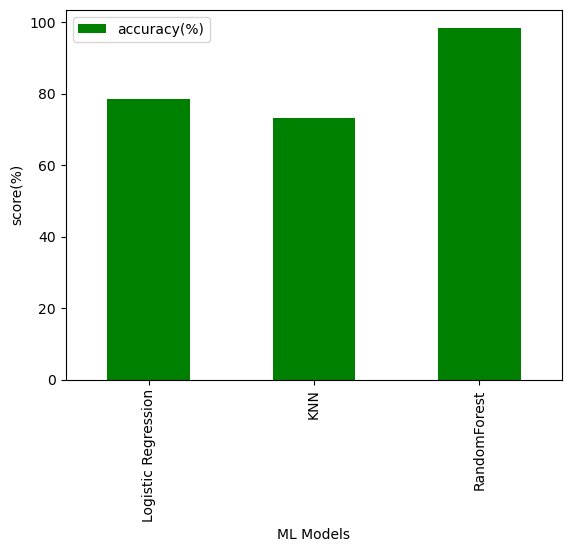

In [31]:
model_compare.T.plot.bar(color={"green"})
plt.xlabel("ML Models")
plt.ylabel("score(%)")

`Let's look at the following
 *Hyperparameter tuning
 *Feature importance
 *Confusion Matrix
 *Cross validation
 *Precision
 *Recall
 *f1
 *classification report
 *ROC curve
 *Area under curve`

In [37]:
#lets tune KNN
train_scores=[]
test_scores=[]
#create a list of different values for n_neighbours
neighbors=range(1,21)
#setup KNN instance
knn=KNeighborsClassifier()
#Loop
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [38]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

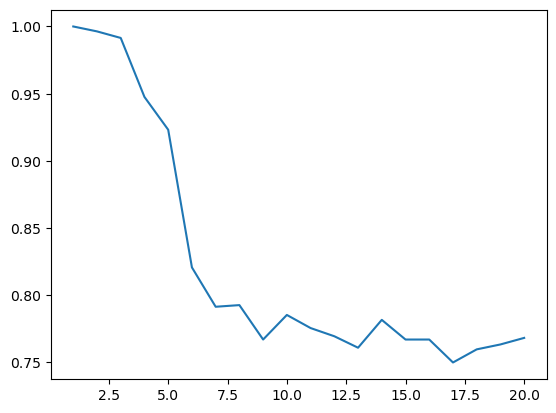

In [39]:
plt.plot(neighbors,train_scores,label="Train score")

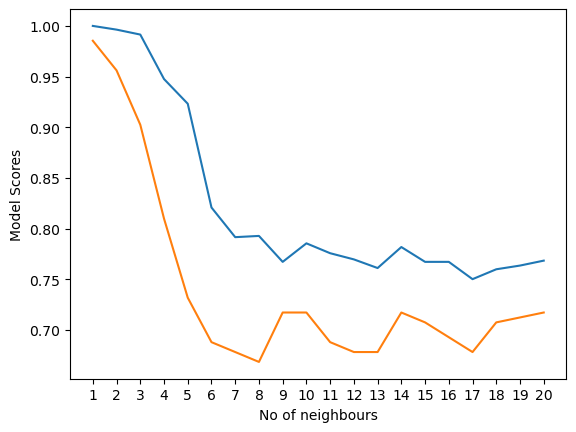

In [43]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Train score")
plt.xlabel("No of neighbours")
plt.ylabel("Model Scores")
plt.xticks(np.arange(1,21,1));

In [44]:
print(f"Max KNN score on test data:{max(test_scores)*100:.2f}%")

Max KNN score on test data:98.54%


In [50]:
## Hyperparameter tuning on RandomisedSearchCV
##we are going to tune
##LogisticRegression
##RandomForestClassifier


In [60]:
#create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

In [52]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [53]:
#create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,100,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [61]:
#Tune LogisticRegression
np.random.seed(42)
#set up random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

In [62]:
#fit random hyperparameters
rs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [64]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [65]:
rs_log_reg.score(x_test,y_test)

0.7853658536585366

In [68]:
#now we have tuned Logistic Regression now it's RandomForest
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                    param_distributions=rf_grid,
                    cv=5,
                    n_iter=20,
                    verbose=True)

In [69]:
rs_rf.fit(x_train,y_train)
rs_rf

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [70]:
#finding best hyperparameters
rs_rf.best_params_


{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': None}

In [72]:
#evaluate
rs_rf.score(x_test,y_test)

0.9024390243902439

In [74]:
#gridSearchCV hyperparameter tuning
#different hyperparameter for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

In [75]:
#setup grid hyperparameter search for logistic regresssion
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

In [76]:
#fit grid
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [77]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [78]:
#evaluate
gs_log_reg.score(x_test,y_test)

0.7853658536585366

### Evaluating our tuned ML classifier beyond accuracy

`ROC curve and AUC curve
Confusion Matrix
Classification report
Precision
Recall
F1 score`



In [79]:
#To make comparisons and evaluate
y_preds=gs_log_reg.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [80]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

D:\Code\thak\sample_proj1\hear_disease_proj\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


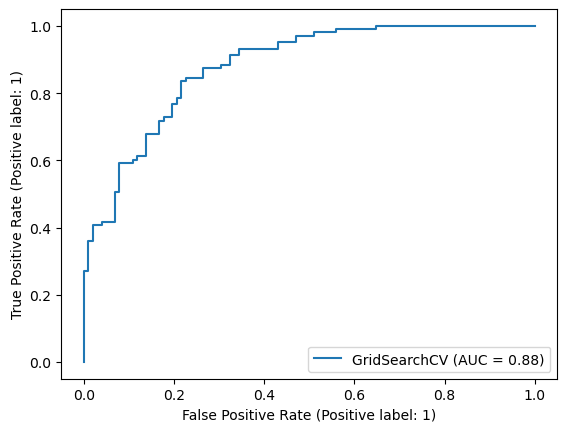

In [81]:
#Plot ROC curve
plot_roc_curve(gs_log_reg,x_test,y_test)

In [82]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[71 31]
 [13 90]]


In [83]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [84]:
pip install seaborn

     -------------------------------------- 288.2/288.2 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip show seaborn

Name: seaborn
Version: 0.12.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: d:\code\thak\sample_proj1\hear_disease_proj\env\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [86]:
import seaborn as sns

In [87]:
sns.set(font_scale=1.5)

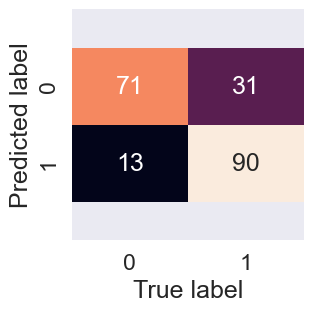

In [88]:
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+.5,top-.5)
plot_conf_mat(y_test,y_preds)

In [89]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [91]:
#calculate evaluation metrics using cross-validation
#check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [92]:
#create a new classifier
clf=LogisticRegression(C=1.3738237958832638,
                      solver="liblinear")

In [98]:
from sklearn.model_selection import cross_val_score
cv_ac=cross_val_score(clf,
                     x,
                     y,
                     cv=5,
                     scoring="accuracy")
cv_ac

array([0.88780488, 0.85853659, 0.87317073, 0.8195122 , 0.8       ])

In [99]:
np.mean(cv_ac)

0.8478048780487806

In [101]:
cv_pr=cross_val_score(clf,
                     x,
                     y,
                     cv=5,
                     scoring="precision")
cv_pr

array([0.85964912, 0.83928571, 0.84347826, 0.78813559, 0.7826087 ])

In [102]:
np.mean(cv_pr)

0.8226314773669621

In [103]:
cv_re=cross_val_score(clf,
                     x,
                     y,
                     cv=5,
                     scoring="recall")
cv_re

array([0.93333333, 0.8952381 , 0.92380952, 0.88571429, 0.8490566 ])

In [104]:
np.mean(cv_re)

0.8974303683737646

In [105]:
cv_f1=cross_val_score(clf,
                     x,
                     y,
                     cv=5,
                     scoring="f1")
cv_f1

array([0.89497717, 0.86635945, 0.88181818, 0.83408072, 0.81447964])

In [106]:
np.mean(cv_f1)

0.8583430306540801

#### VISUALISE cross validated metrics 

In [113]:
cv_metrics=pd.DataFrame({"Accuracy":cv_ac,
                        "Precision":cv_pr,
                        "recall":cv_re,
                        "f1":cv_f1})

<AxesSubplot:title={'center':'cross-validated classification metrics'}>

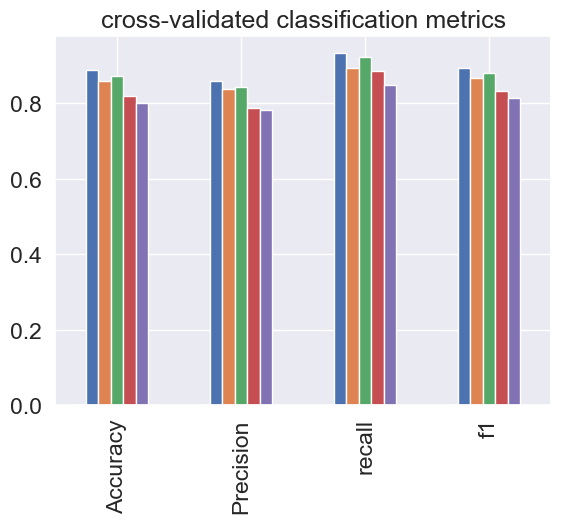

In [115]:
cv_metrics.T.plot.bar(title="cross-validated classification metrics",
                     legend=False)

## Feature Importance

In [116]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [117]:
#fit instance for logistic regression
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [118]:
clf=LogisticRegression(C=1.3738237958832638,
                      solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [119]:
clf.coef_

array([[ 0.01317886, -1.66598722,  0.85030644, -0.01558897, -0.00820035,
        -0.2040116 ,  0.32254173,  0.03488921, -0.78931514, -0.64867068,
         0.566494  , -0.81419192, -1.03697069]])

In [121]:
#Make coef of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.013178861558196085,
 'sex': -1.6659872237282174,
 'cp': 0.8503064415591945,
 'trestbps': -0.015588967334443371,
 'chol': -0.008200350879692831,
 'fbs': -0.20401160321255557,
 'restecg': 0.32254172896092986,
 'thalach': 0.03488921311454817,
 'exang': -0.7893151356408693,
 'oldpeak': -0.648670677763911,
 'slope': 0.5664939966097383,
 'ca': -0.814191921376566,
 'thal': -1.0369706937648702}

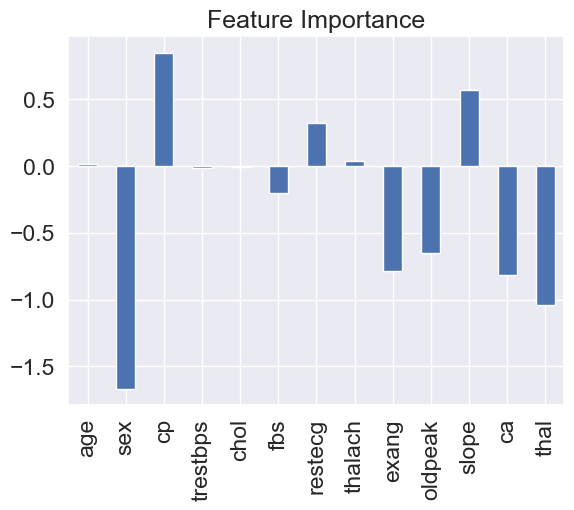

In [123]:
#visualise feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [124]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,86,226
1,413,300


`. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )`

In [125]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


#### Experimentation

### End 